<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/homework-2/Homework_2_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW-2 Task 3
#[LP 1]

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [233]:
# Load the training dataset
train_data = pd.read_csv('ZipDigits.train', header=None, delim_whitespace=True)

# Filter and convert labels for binary classification
train_data = train_data[train_data[0].isin([1, 5])]
train_data[0] = train_data[0].apply(lambda x: 1 if x == 1 else -1)



In [234]:
# Define functions to calculate intensity and symmetry features
def intensity(image):
    return np.mean(image[1:])

def symmetry(image):
    left_half = image[1:129]  # Corrected split into left and right halves
    right_half = image[129:]  # Corrected split into left and right halves
    return np.abs(np.sum(left_half - np.flip(right_half)))




In [235]:
# Calculate features for each image in the training dataset
train_data['Intensity'] = train_data.apply(lambda row: intensity(row.values[1:]), axis=1)
train_data['Symmetry'] = train_data.apply(lambda row: symmetry(row.values[1:]), axis=1)

print(train_data['Intensity'].values)
print(sorted(train_data['Symmetry'].values))

[-0.1082549  -0.75294902 -0.77138824 ... -0.60826275 -0.66098431
 -0.44539216]
[0.0046196078431357535, 0.023396078431375145, 0.023435294117646777, 0.029482352941180068, 0.030478431372550574, 0.03575686274509593, 0.04065098039215087, 0.04414901960783979, 0.04690980392156874, 0.04809411764706084, 0.05028235294117067, 0.05223529411764716, 0.05304313725490317, 0.057466666666663, 0.058901960784311314, 0.0680156862745136, 0.06966274509804293, 0.08391372549019493, 0.08832941176470754, 0.09129411764706319, 0.09265882352940835, 0.09674509803921438, 0.09800000000000608, 0.10326274509804279, 0.1094431372549014, 0.11419607843137669, 0.11575686274510133, 0.12131764705882375, 0.12169411764705629, 0.12389019607842755, 0.1392627450980335, 0.15519215686274634, 0.16200784313726047, 0.16771764705882575, 0.1693411764705921, 0.18080784313725218, 0.18450980392156424, 0.18616470588235856, 0.18887843137254734, 0.18919215686274526, 0.20189019607843406, 0.20233725490196264, 0.20364705882353107, 0.20684705882353

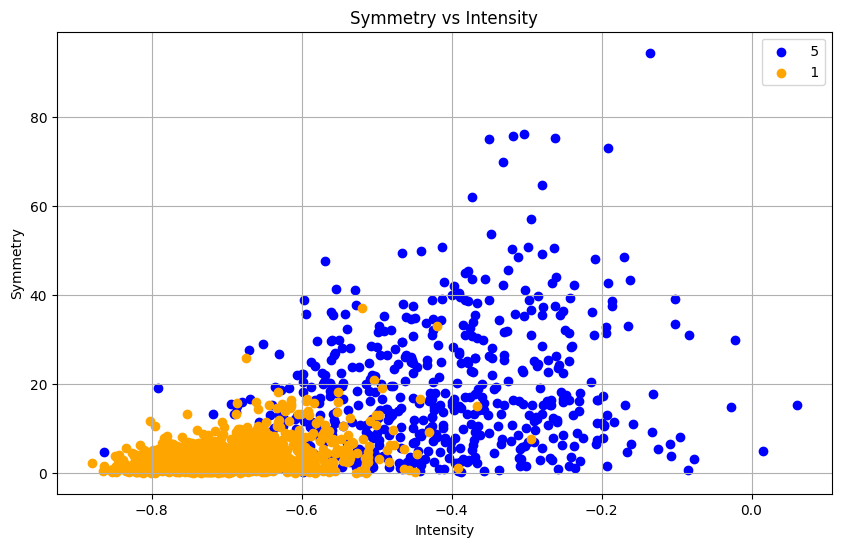

In [236]:
# Create a scatter plot with labeled classes
plt.figure(figsize=(10, 6))
for label, group in train_data.groupby(0):
    if label == 1:
        plt.scatter(group['Intensity'], group['Symmetry'], label=' 1', color='orange')
    else:
        plt.scatter(group['Intensity'], group['Symmetry'], label=' 5', color='blue')

plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend(loc='upper right')
plt.title('Symmetry vs Intensity')
plt.grid(True)

# Save or display the plot
plt.show()

# (a)

In [237]:
def misclassified_points():
    return [(x1[i], x2[i], y[i]) for i in range(len(x1)) if (w0 + w1 * x1[i] + w2 * x2[i]) * y[i] <= 0]

def PLA():
    global w0, w1, w2
    for i in range(10000):
        misclassified = misclassified_points()
        if not misclassified:
            break
        x1_misclassified, x2_misclassified, y_misclassified = misclassified[0]
        w0 += y_misclassified
        w1 += y_misclassified * x1_misclassified
        w2 += y_misclassified * x2_misclassified
    return len(misclassified)

In [238]:
x1 = train_data[['Intensity']].values
x2 = train_data[['Symmetry']].values
y = train_data[0].values

print(len(x1),len(x2),len(y))
w0,w1,w2 = 0,0,0

misclassifications_PLA = PLA()
print(w0,w1,w2)

1561 1561 1561
-154 [-247.84789412] [1.28421176]


Weights obtained from PLA --> w0:  -154    w1: [-247.84789412]    w2:  [1.28421176]


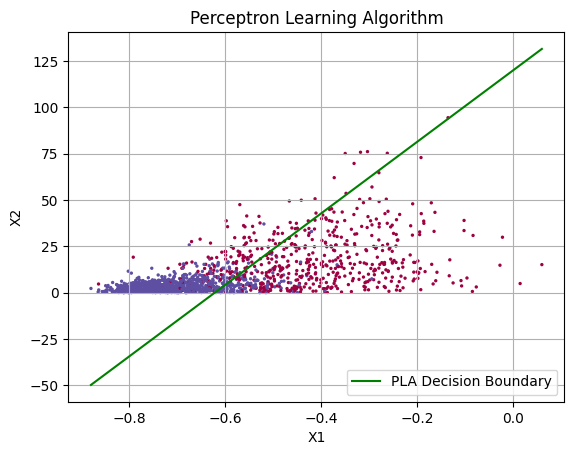

In [239]:
x1_temp = x1
x2_temp = x2
y_temp = y
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral,s=2)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2

plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from PLA -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
plt.show()

# (b)

In [240]:
def pocket_algorithm(x1, x2, y):
    w0, w1, w2 = 0.0, 0.0, 0.0
    w_pocket0, w_pocket1, w_pocket2 = w0, w1, w2
    best_misclassifications = len(x1)

    for _ in range(1000):
        misclassifications = 0
        for i in range(len(x1)):
            prediction = w0 + w1 * x1[i] + w2 * x2[i]
            if (prediction > 0 and y[i] == -1) or (prediction <= 0 and y[i] == 1):
                misclassifications += 1
                w0 += y[i]
                w1 += y[i] * x1[i]
                w2 += y[i] * x2[i]

        if misclassifications < best_misclassifications:
            w_pocket0, w_pocket1, w_pocket2 = w0, w1, w2

        if misclassifications == 0:
            break
    return (w_pocket0, w_pocket1, w_pocket2),misclassifications

best_w_pocket,missclassifications_Pocket = pocket_algorithm(x1, x2, y)

v0,v1,v2 = best_w_pocket

Weights obtained from Pocket --> w0:  -316.0    w1: [-694.86056471]    w2:  [-25.56184314]


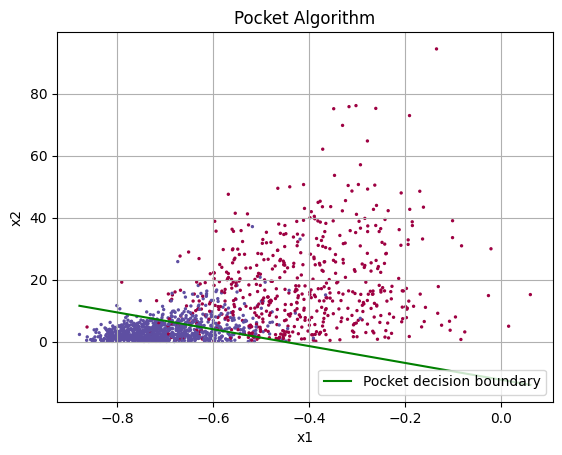

In [241]:
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral,s=2)

x1_values = np.linspace(min(x1), max(x1), 100)
x2_values = [(-best_w_pocket[0] - best_w_pocket[1] * x1) / best_w_pocket[2] for x1 in x1_values]
plt.plot(x1_values, x2_values, label='Pocket decision boundary', color='green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc = 'lower right')
plt.title('Pocket Algorithm')
plt.grid(True)
v0,v1,v2 = best_w_pocket
print("Weights obtained from Pocket -->", "w0: ",v0,"   w1:",v1,"   w2: ",v2)
plt.show()

# (C)

In [242]:

print("PLA error percentage is ",(misclassifications_PLA/len(x1))*100,"%")
print("Pocket error percentage is ",(missclassifications_Pocket/len(x1)*100),"%")
#y_pred_pocket = np.sign(v0 + v1 * x1_test + w2_pocket * x2_test)

PLA error percentage is  27.994875080076874 %
Pocket error percentage is  11.08263933376041 %


The PLA error percentage is 28 and pocket has an error percentage of 11. For the given number of iterations, it seems like there are still many misclassified points but overall pocket has the better linear seperator.

#[LP 2]

In [251]:

def third_order_polynomial_transform(x1, x2):
    features = [np.ones(len(x1))]
    for i in range(1, 4):
        for j in range(i + 1):
            features.append((x1 ** (i - j)) * (x2 ** j))
    return np.array(features).T

def pocket_algorithm_3rd_order(x, y):
    w = np.zeros(10)
    w_pocket = w.copy()
    best_misclassifications = len(x)

    for _ in range(1000):
        misclassifications = 0
        for i in range(len(x)):
            prediction = np.dot(w, x[i])
            if (prediction > 0 and y[i] == -1) or (prediction <= 0 and y[i] == 1):
                misclassifications += 1
                w += y[i] * x[i]

        if misclassifications < best_misclassifications:
            w_pocket = w.copy()
            best_misclassifications = misclassifications

        if misclassifications == 0:
            break

    return w_pocket



In [252]:
x1 = train_data[['Intensity']].values.flatten()
x2 = train_data[['Symmetry']].values.flatten()
y = train_data[0].values.flatten()

transformed_features = third_order_polynomial_transform(x1, x2)
best_w_pocket_3rd_order = pocket_algorithm_3rd_order(transformed_features, y)


Error Percentage: 14.41%


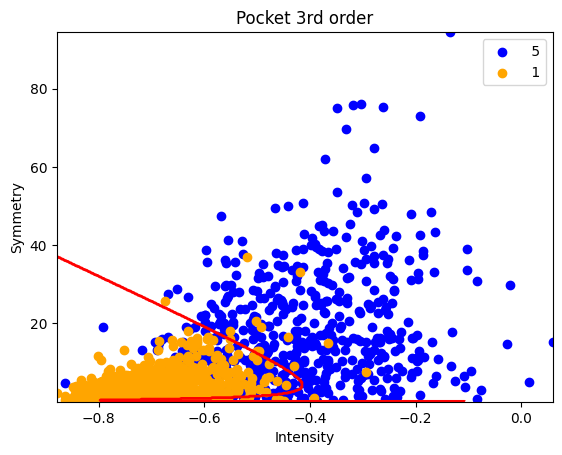

In [256]:
# Calculate and print the error percentage
misclassifications = sum(1 for i in range(len(transformed_features)) if np.sign(np.dot(best_w_pocket_3rd_order, transformed_features[i])) != y[i])
error_percentage = (misclassifications / len(transformed_features)) * 100
print(f"Error Percentage: {error_percentage:.2f}%")

# Create a smoother grid for plotting the polynomial boundary
xx, yy = np.meshgrid(np.linspace(x1.min(), x1.max(), 500), np.linspace(x2.min(), x2.max(), 500))
grid = third_order_polynomial_transform(xx.ravel(), yy.ravel())
Z = np.sign(np.dot(grid, best_w_pocket_3rd_order))
Z = Z.reshape(xx.shape)

# Plot the data points
plt.scatter(x1[y == -1], x2[y == -1], label=' 5', color='blue')
plt.scatter(x1[y == 1], x2[y == 1], label=' 1', color='orange' )


# Plot the polynomial boundary
plt.contour(xx, yy, Z, colors='red', levels=[0], linewidths=2)

plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.title('Pocket 3rd order')
plt.show()

### The error percentage for 3rd order pocket is 14.41%